In [1]:
import matplotlib.pyplot as plt
import time

In [2]:
from common_functions import *

2022-12-05 13:42:43.583190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 13:42:44.297361: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-05 13:42:44.297413: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-05 13:42:44.297420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [11]:
# codebook = np.load('transformed_data/codebook.npy')
# C = np.load('transformed_data/C.npy')
# Cv = np.load('transformed_data/Cv.npy')
L = np.load('transformed_data/L.npy')
Lv = np.load('transformed_data/Lv.npy')
_, y, _, yv = load_mini_speech_commands()

# X, y, Xv, yv = load_mini_speech_commands()
# N_train = np.shape(X)[0]
# N_test = np.shape(Xv)[0]
# from sklearn.cluster import MiniBatchKMeans

# kmeans = MiniBatchKMeans(n_clusters=16)
# for Xi in X:
#     v = np.reshape(im2col(Xi),(64*64,4))
#     kmeans.partial_fit(v)
# codebook = kmeans.cluster_centers_
# np.save('transformed_data/codebook',codebook)

# # Encode
# C = np.zeros((N_train,64,64,4),dtype='int8')
# Cv = np.zeros((N_test,64,64,4),dtype='int8')
# for idx in range(N_train):
#     C[idx] = 2*VQ_encode_STFT(X[idx],codebook)-1
# for idx in range(N_test):
#     Cv[idx] = 2*VQ_encode_STFT(Xv[idx],codebook)-1
# np.save('transformed_data/C',C)
# np.save('transformed_data/Cv',Cv)

# # Decode
# L = np.zeros(np.shape(X))
# Lv = np.zeros(np.shape(Xv))
# for idx in range(N_train):
#     L[idx] = VQ_decode_STFT(((C[idx]+1)//2).astype('int8'),codebook)
# for idx in range(N_test):
#     Lv[idx] = VQ_decode_STFT(((Cv[idx]+1)//2).astype('int8'),codebook)
# np.save('transformed_data/L',L)
# np.save('transformed_data/Lv',Lv)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.


In [12]:
model = models.Sequential([
    layers.Input(shape=(128,128,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 128, 128, 1)      4         
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                      

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [14]:
train_acc = [];
test_acc = [];
elapsed_time = [];

2022-12-05 13:45:17.890847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2022-12-05 13:45:18.429634: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-05 13:45:18.590070: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f7c0d90beb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-05 13:45:18.590097: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2022-12-05 13:45:18.594874: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-05 13:45:18.668066: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-05 13:45:18.737363: I tensorflow/compiler/jit/xla_compilati

50/50 [==============================] - 0s 4ms/step - loss: 1.8762 - accuracy: 0.7262


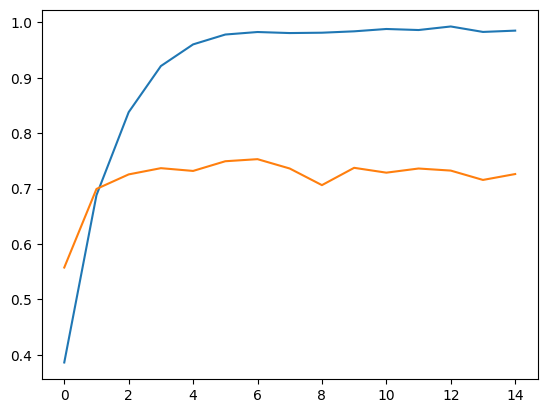

In [15]:
for i_iter in range(15):
    t = time.process_time()
    train_history = model.fit(x=L, y=y, epochs=1, batch_size=64);
    elapsed_time.append(time.process_time()-t)
    _, test_acc_i = model.evaluate(x=Lv, y=yv)
    train_acc.append(train_history.history['accuracy'][0])
    test_acc.append(test_acc_i)
plt.plot(np.vstack(train_acc))
plt.plot(np.vstack(test_acc))

In [16]:
print(np.median(elapsed_time), "seconds/iteration")
print(np.median(test_acc[-5:]), "test accuracy")

2.8489068060000022 seconds/iteration
0.7287499904632568 test accuracy
